### Modeling a Pendulum

Classical mechanics is the description of the world that started with Sir Isaac Newton. The use of calculus to describe the physical world around us has been a powerful tool for hundreds of years. Whilst many of the ideas of classical mechanics have been superseded by relativistic or quantum mechanics, calculus and differential equations retain a key role.

In this workbook, we'll consider a classic example of a harmonic oscillator - the pendulum. A pendulum is a mass or 'bob' on a piece of string that swings back and forth with a regular period. We'll model it with a second-order linear ordinary differential equation. 

![title](img/Simple_gravity_pendulum.svg.png)

As well as a pendulum, the harmonic oscillator can describe a spring-mass system, and other systems besides. As well as incorporating the restorative force, we can include some damping term $b$ and some forcing term $f$. 

The key quantities of motion can be phrased as derivatives. If $x$ is the position, the rate of change of $x$, $\frac{dx}{dt}$, describes the velocity, and $\frac{d^2x}{dt^2}$ is the acceleration. We can describe Simple Harmonic Motion as:

$$ \frac{d^2x}{dt^2} + cx = 0. $$

Essentially, the acceleration opposes the displacement; the system seeks to return to some equilibrium position.

A full ODE including the damping (resistive force) and forcing (some additional controlled force in time) is as follows: 

$$ a \frac{d^2x}{dt^2} + b \frac{dx}{dt} + c x = f(t) $$

So, how can we solve this?

### Numerical Solution

There are some known analytic solutions for basic forcings, but we'll need a computational algorithm for more involved systems. In particular, it's helpful to be able to check the accuracy of our scheme against known solutions where possible to evaluate both our choice of algorithm and our implementation of it.

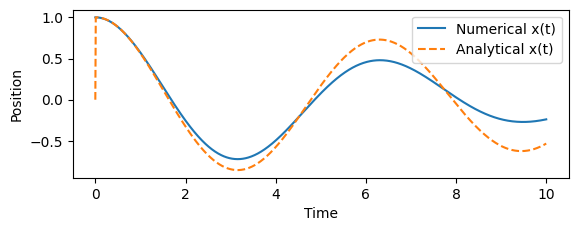

total error: 0.17477495256915213


In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Define f(t, x, v) for timestepping
def f(t, x, v, a, b, c):
    forcing_term = 0.1 * np.sin(t)
    #forcing_term = 0
    return (forcing_term - b * v - c * x) / a

### Analytical solution for comparison (Only works when b^2-4ac < 0 !)
def analytical_solution(t, a, b, c, x0, v0):
    omega = np.sqrt(4*a*c - b**2) / (2*a)
    decay = -b / (2*a)
    A = x0
    B = (v0 - decay * x0) / omega
    return np.exp(decay * t) * (A * np.cos(omega * t) + B * np.sin(omega * t))


# Initialize parameters
a = 1.0
b = 0.1
c = 1.0
dt = 0.01
T = 10

# Initialize initial conditions
x0 = 1
v0 = 0

#Initialise variables
N = int(T / dt)
t_values = np.linspace(0, T, N)
x_values = np.zeros(N)
v_values = np.zeros(N)
x_analytical = np.zeros(N)
x_values[0] = x0
v_values[0] = v0

# Time-stepping loop
for i in range(1, N):
    t = t_values[i-1]
    x = x_values[i-1]
    v = v_values[i-1]
    
    x_new = x + v * dt
    v_new = v + f(t, x, v, a, b, c) * dt
    x_values[i] = x_new
    v_values[i] = v_new

    # Analytical solution for comparison
    x_analytical[i] = x_analytical[i] = analytical_solution(t, a, b, c, x0, v0) #comment this for no analytical solution

# Calculate error
L2_error = np.sqrt(np.mean((x_analytical - x_values)**2))

# Plot results
plt.figure()
plt.subplot(2, 1, 1)
plt.plot(t_values, x_values, label='Numerical x(t)')
plt.plot(t_values, x_analytical, label='Analytical x(t)', linestyle='dashed') #comment this for no analytical solution
plt.xlabel('Time')
plt.ylabel('Position')
plt.legend()


#can turn the below on to plot velocity too!
# plt.subplot(2, 1, 2)
# plt.plot(t_values, v_values, label='Numerical v(t)', color='r')
# plt.xlabel('Time')
# plt.ylabel('Velocity')
# plt.legend()

plt.show()

# Output error
print(f"total error: {L2_error}") #comment this for no analytical solution


Questions to explore:

1) Why do we get the shape of output that we do?

2) When there's no forcing, what's the difference in the real-world between b = 0 and $b \neq 0$?

3) Why might we compare our computed solution against an analytical solution?

4) Why do we get some error between the computed solution and the true (analytical) solution? How can we decrease the error? 

5) Experiment with some different values of the coefficients $a$, $b$ and $c$. How does each coefficient affect the shape of the solution? Does every possible combination of coefficients correspond to a real-world pendulum? 

6) What are the importance of the initial conditions?

7) Try a non-zero function for the forcing. What happens?

8) What assumptions did we make to design this model? What are some limitations of our model?

9) Experiment with the forcing. How does the shape of the output respond? 

10) Look at how we work out the next value of $x$ at every timestep. This is called an Euler method. Research these, and propose and implement a more efficient method. 


### Adding Complexity

What happens if we add more complexity to the scenario? If we attach another pendulum to the end of this pendulum, what do you think will happen? Take a look at the video linked below:

https://www.youtube.com/watch?v=U39RMUzCjiU